In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [11]:
df = pd.read_csv('C:\\Users\\rosha\\Downloads\\predictiveMaintainence.csv')

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Preprocessing Data

In [13]:
# Handling invalid data

df.columns = df.columns.str.replace('[', '').str.replace(']', '')
df.replace("?", np.nan, inplace=True)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

df.head()

,UDI,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Overall failure rate: 3.39%


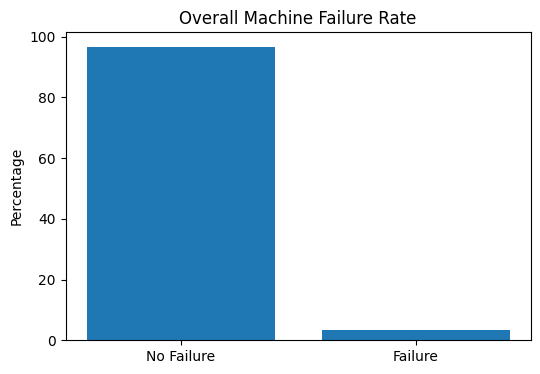

In [15]:
failure_rate = df['Machine failure'].mean() * 100
print(f"Overall failure rate: {failure_rate:.2f}%")

# Visualize with a simple bar chart
plt.figure(figsize=(6, 4))
plt.bar(['No Failure', 'Failure'], [100 - failure_rate, failure_rate])
plt.ylabel('Percentage')
plt.title('Overall Machine Failure Rate')
plt.show()

# Exploratory Data Analysis EDA

In this section, we perform exploratory data analysis (EDA) to understand the distributions and relationships of the numerical features relevant to predicting machine failures. This involves visualizing the pairwise relationships between the features and their influence on machine failure occurrences.

### Numerical Features Analysis

The selected numerical features for this analysis include:
- Air temperature (K): Represents the ambient temperature during the operation of the machine.
- Process temperature (K): Indicates the temperature of the machine itself during the operation.
- Rotational speed (rpm): The speed at which the machine parts rotate.
- Torque (Nm): The amount of twisting force applied by the machine.
- Tool wear (min): The wear and tear of the machine tool, measured in minutes of operation.

We start by visualizing the pairwise relationships among these features using a pairplot. This visualization will help us identify patterns and correlations that could inform the machine failure predictions.



## Pairplot for Numerical Features

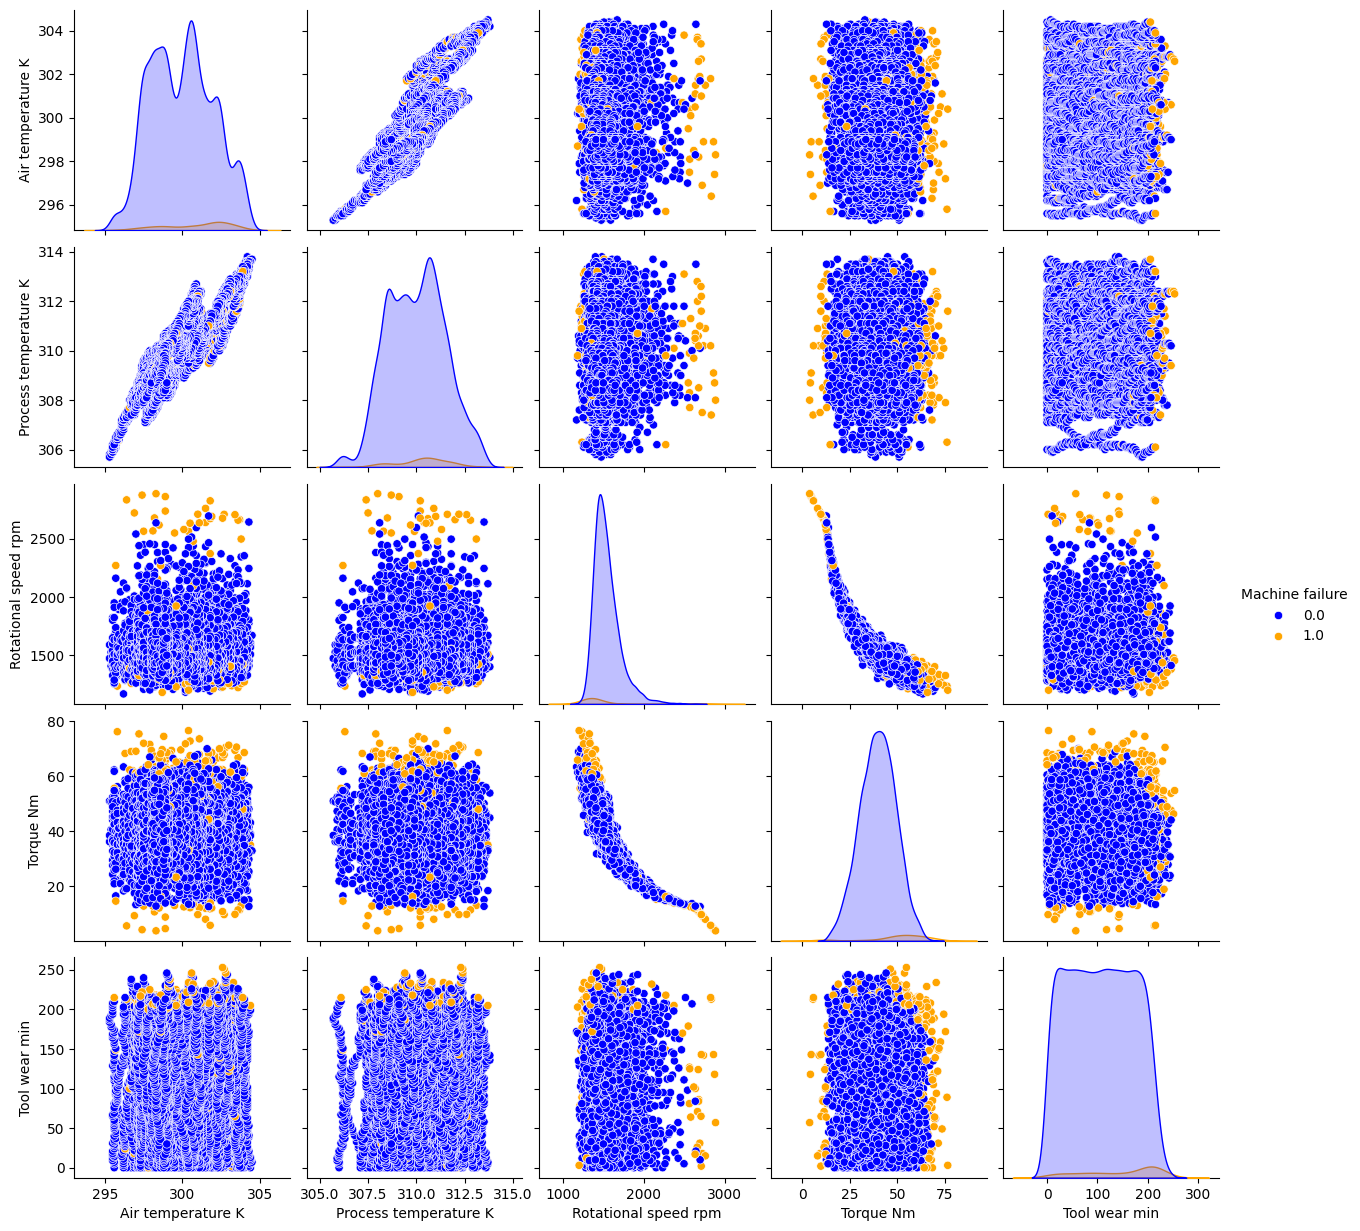

In [16]:
# List of numerical features to be analyzed, based on the dataset description
numerical_features = [
    'Air temperature K',
    'Process temperature K',
    'Rotational speed rpm',
    'Torque Nm',
    'Tool wear min'
]

# Generating pairplot
sns.pairplot(df_numeric[numerical_features + ['Machine failure']], hue='Machine failure', palette={0: 'blue', 1: 'orange'})
plt.show()

<Axes: >

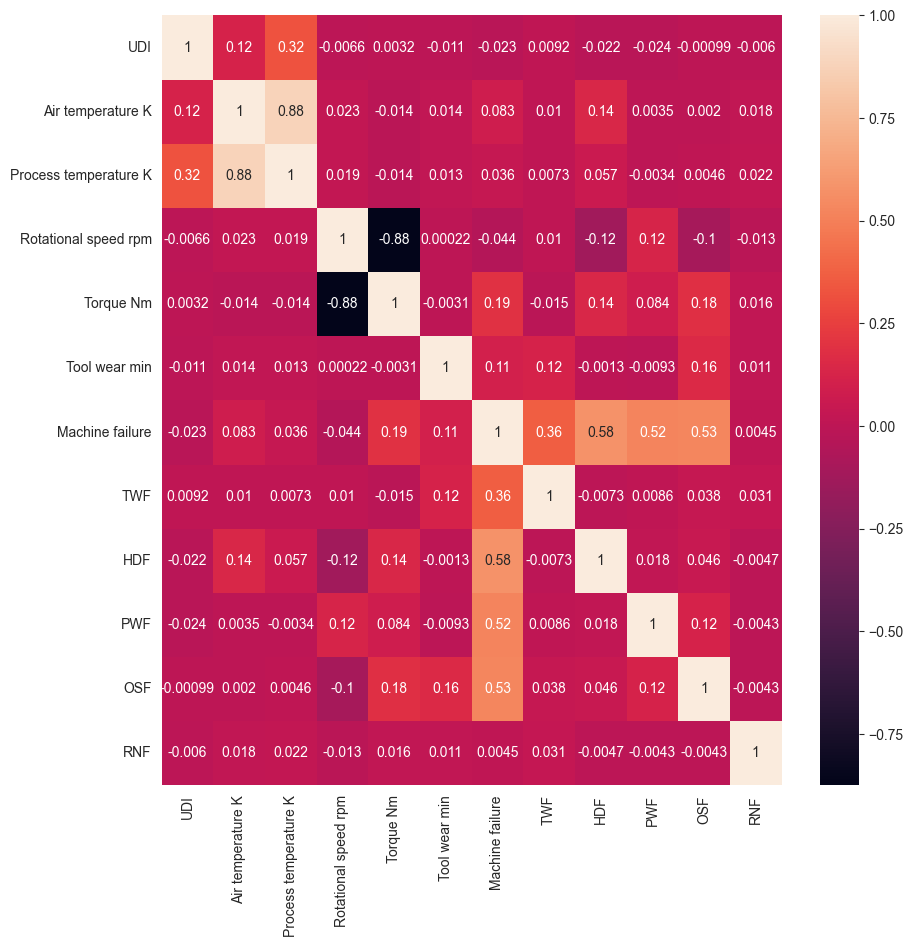

In [17]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("darkgrid", {"axes.facecolor": ".0"})
df_cluster2 = df_numeric.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            annot=True)

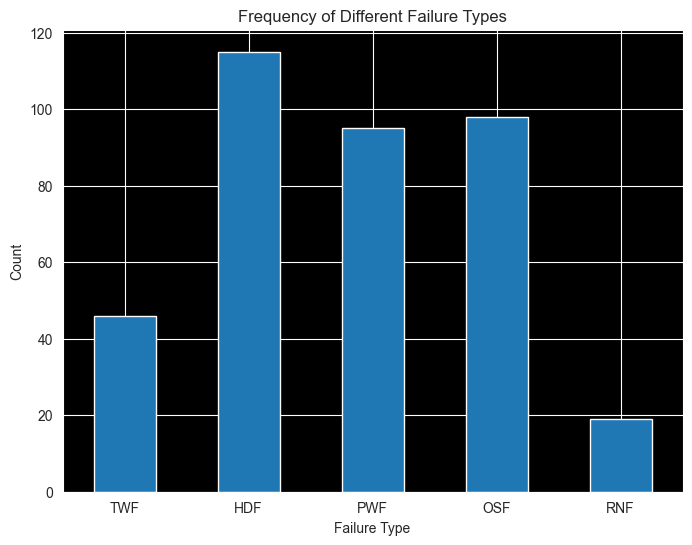

In [18]:
import matplotlib.pyplot as plt

failure_counts = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

plt.figure(figsize=(8, 6))
failure_counts.plot(kind='bar')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.title('Frequency of Different Failure Types')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.grid(True)
plt.show()

# Feature Engineering

We will create two new features that are expected to provide valuable insights into machine operations:
- **Torque_Rotational_speed**: This feature is a product of the torque and rotational speed. It represents the total mechanical power exerted by the machine, which may be a critical factor in predicting machine failures.
- **Temperature_difference**: This feature represents the difference between the process temperature and air temperature. A significant difference might indicate abnormal operating conditions.


In [19]:
df['Torque_Rotational_speed'] = df['Torque Nm'] * df['Rotational speed rpm']
df['Temperature_difference'] = df['Process temperature K'] - df['Air temperature K']

df.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF','Type'],axis=1,inplace=True)
list(df)

['Air temperature K',
 'Process temperature K',
 'Rotational speed rpm',
 'Torque Nm',
 'Tool wear min',
 'Machine failure',
 'Torque_Rotational_speed',
 'Temperature_difference']

In [32]:
df = pd.get_dummies(df,drop_first=True)
df

,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,Torque_Rotational_speed,Temperature_difference
0,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8,10.5
1,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4,10.5
2,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2,10.4
3,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5,10.4
4,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0,10.5
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0.0,47318.0,9.6
9996,298.9,308.4,1632.0,31.8,17.0,0.0,51897.6,9.5
9997,299.0,308.6,1645.0,33.4,22.0,0.0,54943.0,9.6
9998,299.0,308.7,1408.0,48.5,25.0,0.0,68288.0,9.7


In [21]:
df_numeric.fillna(df_numeric.mean(), inplace=True)
for feature in df.columns:
    df[feature].fillna(df[feature].mean(), inplace=True)


C:\Users\rosha\AppData\Local\Temp\ipykernel_24304\627787549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)


In [22]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature K,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.50,304.5
Process temperature K,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.10,313.8
Rotational speed rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.00,2886.0
Torque Nm,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.80,76.6
Tool wear min,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.00,1.0
Torque_Rotational_speed,10000.0,59967.14704,10193.093881,10966.8,53105.4,59883.9,66873.75,99980.4
Temperature_difference,10000.0,10.00063,1.001094,7.6,9.3,9.8,11.00,12.1


# Feature Selection

In this section, we use two different techniques to refine our feature set: univariate feature selection and backward stepwise regression. These methods help to reduce overfitting, improve model performance, and decrease computational complexity.


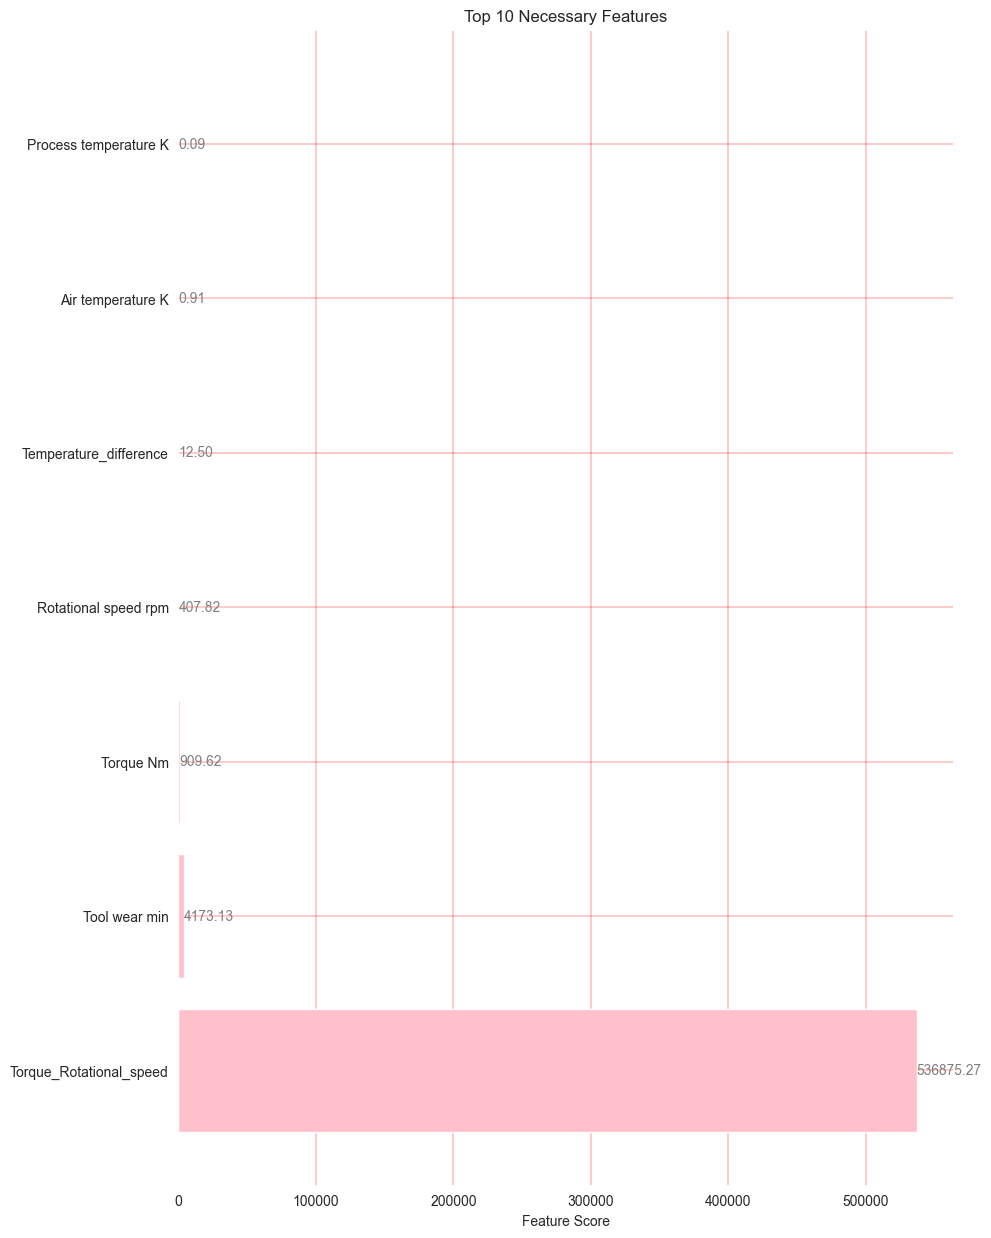

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k='all')

y = df['Machine failure']  # For binary classification (0,1)
X = df.drop(columns=['Machine failure'])
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_, columns=["score"])
df_col = pd.DataFrame(X.columns, columns=["feature"])

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.sort_values(by=['score'], ascending=False, inplace=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 15))
bars = plt.barh(feature_score['feature'][0:10], feature_score['score'][0:10], color='pink')
plt.xlabel('Feature Score')
plt.title('Top 10 Necessary Features')

# Set white grid with black lines
plt.grid(True, color='red', linestyle='-', linewidth=0.3)
plt.gca().set_facecolor('white')

# Add annotations to the bars
plt.gca().bar_label(bars, fmt='%.2f',color = 'grey')

plt.show()


# Modeling

### Data Scaling

To normalize feature values and prevent any single feature from dominating the model, we use `MinMaxScaler` to scale the data.

### Model Training

We use a `RandomForestClassifier` to predict machine failures, as it performed better than `XGBoostClassifier` in our tests. The model is trained on the scaled training data.

### Threshold Adjustment

We adjusted the prediction threshold to balance false positives and false negatives, crucial for minimizing costly false negatives in predictive maintenance.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Training my model with the neccesary parameters
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.46
y_pred_new = (y_pred_proba >= threshold).astype(int)


### Model Evaluation

After training, the model is evaluated using the testing set. Several metrics are computed to assess the model's performance:
- **Confusion Matrix**: Shows the number of correct and incorrect predictions, broken down by class.
- **Classification Report**: Includes precision, recall, F1-score, and support for each class.
- **ROC Curve and AUC Score**: The Receiver Operating Characteristic curve is plotted along with the Area Under the Curve (AUC) score to evaluate the model's ability to discriminate between classes.
- **Other Metrics**: Accuracy, recall, precision, F1-score, and Matthews correlation coefficient (MCC) provide additional insights into model performance.

In [27]:
# Confusion Matrix
conf_matrix_new = confusion_matrix(y_test, y_pred_new)
print(f"Confusion Matrix:\n{conf_matrix_new}")

Confusion Matrix:
[[1928    4]
 [  18   50]]


In [28]:
# Classification Report
class_report_new = classification_report(y_test, y_pred_new, digits=4)
print(f"Classification Report:\n{class_report_new}")

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9908    0.9979    0.9943      1932
         1.0     0.9259    0.7353    0.8197        68

    accuracy                         0.9890      2000
   macro avg     0.9583    0.8666    0.9070      2000
weighted avg     0.9885    0.9890    0.9884      2000



ROC AUC Score: 95.91%


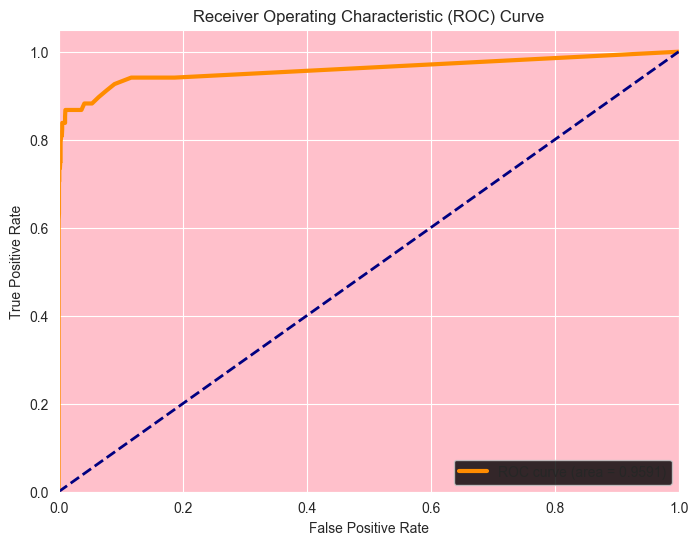

In [29]:
# ROC AUC Score
roc_auc_new = roc_auc_score(y_test, y_pred_proba, average='weighted')
print(f"ROC AUC Score: {roc_auc_new:.2%}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), facecolor='white')
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

legend = plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), fontsize='medium')
legend.get_frame().set_facecolor('lightgrey')

for text in legend.get_texts():
    text.set_color('white')



plt.legend(loc='lower right')
plt.gca().set_facecolor('pink')
plt.show()


In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# Calculating Accuracy, Recall, Precision, F1-Score
accuracy = accuracy_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new, average='weighted')
precision = precision_score(y_test, y_pred_new, average='weighted')
f1s = f1_score(y_test, y_pred_new, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")


Accuracy: 98.90%
Recall: 98.90%
Precision: 98.85%
F1-Score: 98.84%


## Matthews Correlation Coefficient :
The Matthews Correlation Coefficient (MCC) measures the quality of predictions, considering true and false positives and negatives. It gives a balanced score even if the classes have different sizes.

In [31]:
from sklearn.metrics import matthews_corrcoef

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_new)

# Print MCC
print(f"MCC: {mcc:.2%}")


MCC: 81.98%
